# Задание 1. Маректинговые метрики

Известные мне метрики: Показы, клики, ctr (клики / показы)*100%, уникальные/активные пользователи в (день/неделя/месяц/год), <br/>
конверсия (целевое действие / клики)*100%, количество просмотренных страниц, среднее время в приложении, цена за клик (или фикс, или стоимость рекламы / клики), <br/>
расходы(цена) за целевое действие/(лид), стоимость привлечения нового пользователя (затраты на рекламу / новые пользователи),  <br/>
средняя прибыль на пользователя (прибыль / количество пользователей), стоимость удержания (недополученная прибыль в результате промо(?) + ретаргетинг), количество сессий в день, <br/>
ltv - средняя прибыль на пользователя (прибыль за все время пользования - (стоимость привлечения + удержания)) <br/>
roi - окупаемость вложений ( (прибыль- затраты) / затраты)*100% <br/>
Догуглил: <br/>
arppu - средяя выручка на платящего пользователя; разновидость ltv с платящими пользователями вместо всех пользователей <br/>
churn rate - коэф оттока (пользователи в начале периода - в конце периода)/в начале периода <br/>
retention rate - коэф удержания (пользователи в конце периода / пользователи в начале периода) #пользователи одни и те же <br/>
stickness - коэф ~лояльности (активные пользователи в день / активные пользователи в месяц) <br/>


Выведу в качестве топ 5 по важности (без формул, т.к. указал их выше), предполагая, что будут рассчитаны по каналу привлечения/для рекламной кампании:
1. ctr+конверсия (клики/показы)
2. Стоимость привлечения нового пользователя (затраты на рекламу / новые пользователи)
3. roi ((прибыль- затраты) / затраты)*100%
4. Уникальные пользователи в день/месяц
5. Средняя прибыль на пользователя

Не стоимостные факторы:
1. Репутация компании
2. Предварительный анализ рынка, каналов привлечения, аудитории
3. Сезонность
4. Тренды и их соблюдение/создание
5. Сложившаяся аудитория

In [2]:
import sqlite3
import pandas as pd

from math import inf as infinite

import seaborn as sns
sns.set(rc={'figure.figsize':(12 , 8)})

In [267]:
con = sqlite3.connect('mydb.db')
wb = pd.read_excel('dataset.xlsx', sheet_name=None)

#Если база уже создана, то будет ошибка, иначе раскомментить
# for sheet in wb:
#     wb[sheet].to_sql(sheet, con, index=False)
#     con.commit()

In [268]:
cursor = con.cursor()

cursor.execute("""
                SELECT name 
                FROM sqlite_master 
                WHERE type='table' 
                    """)


tables = cursor.fetchall()
print(tables)

[('in_app_events',), ('cost',)]


In [276]:
print(tables[0][4])
print('-----------------------')
print(tables[1][4])

CREATE TABLE "in_app_events" (
"install_date" TIMESTAMP,
  "event_date" TIMESTAMP,
  "event_name" TEXT,
  "gross_event_revenue_usd" REAL,
  "net_event_revenue_usd" REAL,
  "event_source" TEXT,
  "media_channel " TEXT,
  "campaign" TEXT,
  "country_code" TEXT,
  "customer_user_id" TEXT,
  "platform_id" TEXT
)
-----------------------
CREATE TABLE "cost" (
"date" TIMESTAMP,
  "campaign" TEXT,
  "media_channel" TEXT,
  "platform" TEXT,
  "country_code" TEXT,
  "cost" REAL
)


# 2.1
Метрики

In [33]:
#количество уникальных установок

with con:
    data = con.execute("""
                        SELECT campaign, count(*)
                        FROM in_app_events 
                        WHERE event_name = 'install'
                        GROUP BY campaign
                        
                       """)
    for row in data:
        print(row)

('campaign_1', 123)
('campaign_2', 156)
('campaign_3', 122)
('campaign_4', 104)
('campaign_5', 94)
('campaign_6', 114)


In [46]:
#количество уникальных плательщиков

with con:
    data = con.execute("""
                        SELECT campaign, count(distinct customer_user_id)
                        FROM in_app_events 
                        WHERE event_name = 'purchase'
                        GROUP BY campaign
                        
                       """)
    for row in data:
        print(row)

('campaign_1', 23)
('campaign_2', 26)
('campaign_3', 6)
('campaign_4', 18)
('campaign_5', 16)
('campaign_6', 16)


In [48]:
#суммарные затраты на проведение рекламных кампаний

with con:
    data = con.execute("""
                        SELECT campaign, sum(cost)
                        FROM cost 
                        
                        GROUP BY campaign
                        
                       """)
    for row in data:
        print(row)

('campaign_1', 327633.0)
('campaign_2', 511958.0)
('campaign_3', 122298.0)
('campaign_4', 281037.0)
('campaign_5', 95042.0)
('campaign_6', 120435.0)


In [54]:
# суммарная выручка привлеченных пользователей
with con:
    data = con.execute("""
                        SELECT campaign, round(sum(gross_event_revenue_usd), 2)
                        FROM in_app_events 
                        
                        GROUP BY campaign
                        
                       """)
    for row in data:
        print(row)


('campaign_1', 25081.12)
('campaign_2', 42505.39)
('campaign_3', 177.34)
('campaign_4', 71798.65)
('campaign_5', 192.05)
('campaign_6', 363.31)


In [57]:
# количество платежей привлеченных пользователей

with con:
    data = con.execute("""
                        SELECT campaign, count(gross_event_revenue_usd)
                        FROM in_app_events 
                        WHERE event_name = 'purchase'
                        GROUP BY campaign
                        
                       """)
    for row in data:
        print(row)

('campaign_1', 1913)
('campaign_2', 1961)
('campaign_3', 31)
('campaign_4', 3429)
('campaign_5', 82)
('campaign_6', 90)


# 2.2
Метрики из задания 1

In [198]:
#ctr и конверсия считаются просто, но нет данных

In [116]:
# Стоимость привлечения

with con:
    data = con.execute("""
                        SELECT campaign, round((cost/count), 2) as cpu
                        FROM (
                            SELECT cost.campaign, sum(cost.cost) as cost, count --затраты
                            FROM cost 
                            
                            join (

                            SELECT campaign, count(*) as count --новые пользователи
                            FROM in_app_events 
                            WHERE event_name = 'install'
                            GROUP BY campaign
                            ) tmp on tmp.campaign = cost.campaign
                            
                            GROUP BY cost.campaign
                        )tmp
                        
                        GROUP BY campaign
                        
                       """)
    for row in data:
        print(row)


('campaign_1', 2663.68)
('campaign_2', 3281.78)
('campaign_3', 1002.44)
('campaign_4', 2702.28)
('campaign_5', 1011.09)
('campaign_6', 1056.45)


In [251]:
# roi

with con:
    data = con.execute("""
                        SELECT campaign, round( ((prof-cost)/cost) *100, 2)||'%'  --тут || вместо concat(...,'%')
                        FROM (
                            SELECT cost.campaign, sum(cost.cost) as cost, prof  --затраты
                            FROM cost 
                            
                            join (
                            
                                SELECT campaign, sum(net_event_revenue_usd) as prof --прибыль
                                FROM in_app_events 
                                GROUP BY campaign

                                ) tmp on tmp.campaign = cost.campaign
                            
                            GROUP BY cost.campaign
                        )tmp
                        
                        GROUP BY campaign
                        
                       """)
    for row in data:
        print(row)

('campaign_1', '-95.58%')
('campaign_2', '-94.19%')
('campaign_3', '-99.91%')
('campaign_4', '-83.32%')
('campaign_5', '-99.88%')
('campaign_6', '-99.81%')


In [197]:
# уникальные пользователи в месяц (уникальные плательщики) --в pandas построены графики

with con:
    data = con.execute("""
                        SELECT campaign,strftime('%Y %m', event_date), COUNT(distinct customer_user_id) 
                        FROM in_app_events 
                        WHERE event_name = 'purchase'
                        GROUP BY strftime('%Y %m', event_date), campaign
                        ORDER BY campaign
                        
                       """)
    for row in data:
        print(row)

('campaign_1', '2021 01', 2)
('campaign_1', '2021 02', 3)
('campaign_1', '2021 03', 4)
('campaign_1', '2021 04', 6)
('campaign_1', '2021 05', 7)
('campaign_1', '2021 06', 5)
('campaign_1', '2021 07', 6)
('campaign_1', '2021 08', 3)
('campaign_1', '2021 09', 5)
('campaign_1', '2021 10', 6)
('campaign_1', '2021 11', 4)
('campaign_1', '2021 12', 3)
('campaign_1', '2022 01', 4)
('campaign_1', '2022 02', 5)
('campaign_1', '2022 03', 5)
('campaign_1', '2022 04', 6)
('campaign_1', '2022 05', 3)
('campaign_1', '2022 06', 5)
('campaign_1', '2022 07', 3)
('campaign_1', '2022 08', 4)
('campaign_1', '2022 09', 4)
('campaign_1', '2022 10', 3)
('campaign_1', '2022 11', 3)
('campaign_1', '2022 12', 3)
('campaign_1', '2023 01', 3)
('campaign_1', '2023 02', 2)
('campaign_2', '2021 01', 23)
('campaign_2', '2021 02', 5)
('campaign_2', '2021 03', 5)
('campaign_2', '2021 04', 5)
('campaign_2', '2021 05', 4)
('campaign_2', '2021 06', 3)
('campaign_2', '2021 07', 3)
('campaign_2', '2021 08', 4)
('campaign_2'

In [266]:
# средняя прибыль на пользователя

with con:
    data = con.execute("""
                        SELECT tmp.campaign, round((prof/count), 2) as ppu

                        FROM (

                            SELECT tmp.campaign, count(*) as count, prof --новые пользователи
                            
                            FROM in_app_events 
                            

                            join (
                        
                                SELECT campaign, sum(net_event_revenue_usd) as prof --прибыль
                                FROM in_app_events 
                                GROUP BY campaign
                            
                                ) tmp on tmp.campaign = in_app_events.campaign

                            WHERE event_name = 'install'
                            GROUP BY in_app_events.campaign

                        )tmp
                            
                       """)
    for row in data:
        print(row)

('campaign_1', 117.63)
('campaign_2', 190.82)
('campaign_3', 0.91)
('campaign_4', 450.7)
('campaign_5', 1.19)
('campaign_6', 2.01)


# Pandas

In [27]:
df = pd.read_excel('dataset.xlsx')

In [3]:
costs = pd.read_excel('dataset.xlsx', sheet_name=1)

In [4]:
df.head()

,install_date,event_date,event_name,gross_event_revenue_usd,net_event_revenue_usd,event_source,media_channel,campaign,country_code,customer_user_id,platform_id
0,2021-12-30,2022-03-01,purchase,5.35,3.493,S2S,Facebook Ads,campaign_6,US,user_1,android
1,2021-12-30,2022-01-04,purchase,21.64,13.993,S2S,Facebook Ads,campaign_4,US,user_2,android
2,2021-12-31,2022-02-09,purchase,10.71,6.993,S2S,Facebook Ads,campaign_4,US,user_3,android
3,2021-12-31,2022-07-25,purchase,3.21,2.093,S2S,Facebook Ads,campaign_4,US,user_3,android
4,2021-12-31,2022-08-23,purchase,5.35,3.493,S2S,Facebook Ads,campaign_4,US,user_3,android


In [5]:
len(df.customer_user_id.unique()) #уникальных пользователей

730

In [6]:
df.event_name.value_counts() #установок

purchase    7506
install      713
Name: event_name, dtype: int64

In [7]:
df[['event_name','customer_user_id']].where(df['event_name'] == 'install').value_counts().max() # проверил на отсутствие повторений в установках таким образом

1

Единственное предположение почему пользователи и установки могут не совпадать - регистрация вне приложения без последующей установки

# 2.1 Пользуясь данными из датасета посчитайте итоговые результаты проведения каждой рекламной кампании
1. количество уникальных установок
2. количество уникальных плательщиков
3. суммарные затраты на проведение рекламных кампаний
4. суммарную выручку привлеченных пользователей
5. количество платежей привлеченных пользователей


In [8]:
df.campaign.unique()

array(['campaign_6', 'campaign_4', 'campaign_2', 'campaign_5',
       'campaign_1', 'campaign_3'], dtype=object)

In [37]:
#2.1.1 количество уникальных установок
un_installs = {}

for each in df.campaign.unique():
    un_installs[each] = df[['campaign','event_name']].where(df['campaign'] == each).where(df['event_name'] == 'install').value_counts()[0] 
    print(each, un_installs[each]) #value_counts пропускает NaN

campaign_6 114
campaign_4 104
campaign_2 156
campaign_5 94
campaign_1 123
campaign_3 122


In [10]:
#2.1.2 количество уникальных плательщиков
un_payers = {}

for each in df.campaign.unique():
    un_payers[each] = len(df[['campaign','event_name','customer_user_id']].where(df['campaign'] == each).where(df['event_name'] == 'purchase').customer_user_id.dropna().unique())
    print(each, un_payers[each]) 

campaign_6 16
campaign_4 18
campaign_2 26
campaign_5 16
campaign_1 23
campaign_3 6


In [11]:
#2.1.3 суммарные затраты на проведение рекламных кампаний
cost_per_mark_camp = {}

for each in costs.campaign.unique():
    cost_per_mark_camp[each] = costs[['campaign','cost']].where(costs['campaign'] == each).cost.sum()
    print(each, cost_per_mark_camp[each] ) 

campaign_3 122298.0
campaign_2 511958.0
campaign_1 327633.0
campaign_5 95042.0
campaign_6 120435.0
campaign_4 281037.0


In [12]:
#2.1.4 суммарная выручка привлеченных пользователей
sum_rev_per_camp = {}

for each in df.campaign.unique():
    sum_rev_per_camp[each] = df[['campaign','event_name', 'gross_event_revenue_usd']].where(df['campaign'] == each).where(df['event_name'] == 'purchase').gross_event_revenue_usd.sum()
    print(each, round(sum_rev_per_camp[each], 2)) 

campaign_6 363.31
campaign_4 71798.65
campaign_2 42505.39
campaign_5 192.05
campaign_1 25081.12
campaign_3 177.34


In [65]:
#2.1.5 количество платежей привлеченных пользователей
user_paym_per_camp = {}

for each in df.campaign.unique():
    user_paym_per_camp[each] = df[['campaign','event_name','customer_user_id']].where(df['campaign'] == each).where(df['event_name'] == 'purchase').customer_user_id.dropna().value_counts().sum()
    print(each, user_paym_per_camp[each]) 

campaign_6 90
campaign_4 3429
campaign_2 1961
campaign_5 82
campaign_1 1913
campaign_3 31


# 2.2 Пользуясь теоретической базой из п.1 посчитайте метрики эффективности для каждой кампании из Задания 1

In [14]:
df.where(df['event_name'] == 'purchase').event_name.value_counts()

purchase    7506
Name: event_name, dtype: int64

In [67]:
#2.2.1 Возможно это намек на неважность, но недостаточно данных для того, чтобы посчитать ctr и/или конверсию,
# но они и считаются достаточно легко

In [16]:
#2.2.2 Стоимость привлечения: затраты на рекламу п2.1.3 / новые пользователи п2.1.1
cost_per_new_user = {}

for each in cost_per_mark_camp.keys():
    cost_per_new_user[each] = cost_per_mark_camp[each] / un_installs[each]
    print(each, round(cost_per_new_user[each], 2))

campaign_3 1002.44
campaign_2 3281.78
campaign_1 2663.68
campaign_5 1011.09
campaign_6 1056.45
campaign_4 2702.28


In [17]:
#2.2.3 roi: (прибыль с кампании - суммарные затраты п2.1.3) / затраты 

#прибыль с кампании
sum_profit_per_camp = {}

for each in df.campaign.unique():
    sum_profit_per_camp[each] = df.where(df['campaign'] == each).where(df['event_name'] == 'purchase').net_event_revenue_usd.sum()


roi = {}

for each in sum_profit_per_camp.keys():
    roi[each] = str( round(
         ((sum_profit_per_camp[each] - cost_per_mark_camp[each]) / cost_per_mark_camp[each] )*100, 2))+'%'
    print(each, roi[each])

campaign_6 -99.81%
campaign_4 -83.32%
campaign_2 -94.19%
campaign_5 -99.88%
campaign_1 -95.58%
campaign_3 -99.91%


In [18]:
#2.2.4 Уникальные пользователи в месяц (тут посчитаю и визуализирую уникальных плательщиков в месяц, подход похож)


dfmap = df.sort_values(by='event_date').where(df['event_name'] == 'purchase').dropna().copy() #df с покупками

dfmap['event_date'] = dfmap['event_date'].dt.to_period('M') #оставляю только месяц для удобства

act_pay_m_c = []
for ed in dfmap.event_date.unique():
    for camp in dfmap.campaign.unique():
        act_pay_m_c.append(

             (ed, camp, len(dfmap.where(dfmap.event_date == ed).where(dfmap.campaign == camp).customer_user_id.dropna().unique()))
             
               ) #собираю отдельный список с кортежами (год-месяц, кампания, количество уникальных плательщиков)

dff = pd.DataFrame(list(act_pay_m_c), columns=['date','campaign','payers']) #из этого списка соберу новый df по которому буду строить график

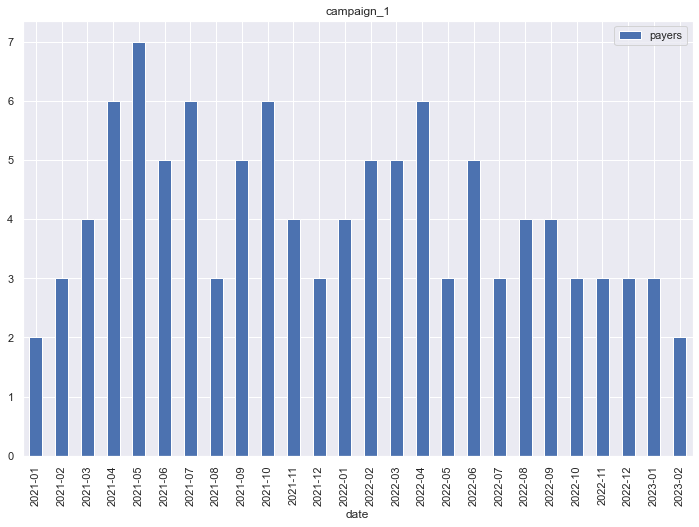

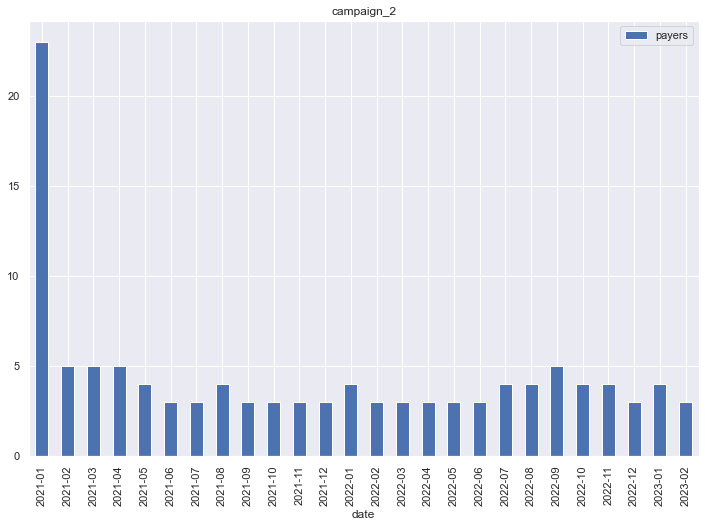

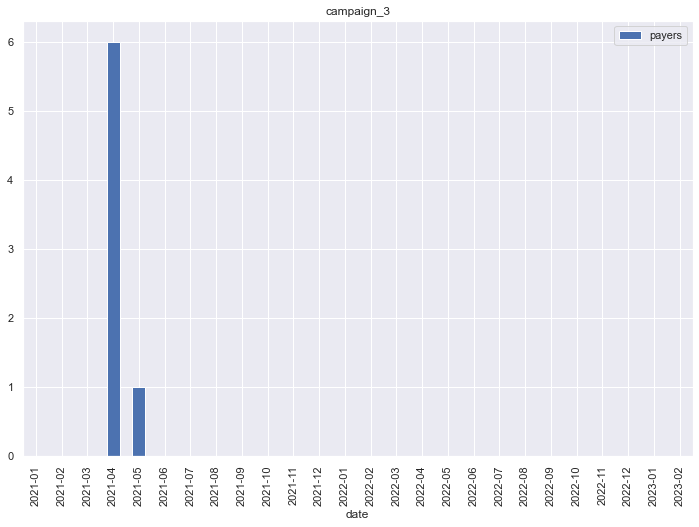

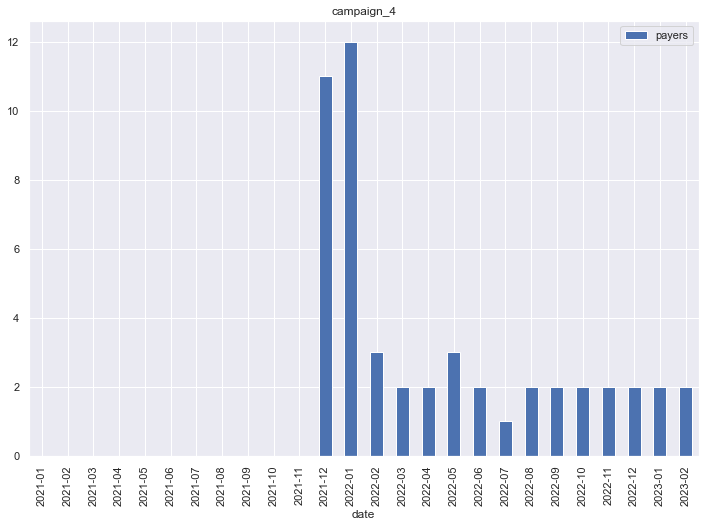

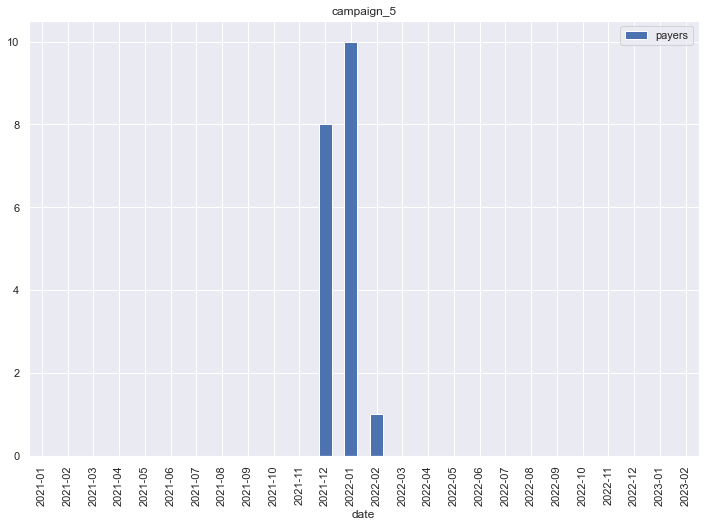

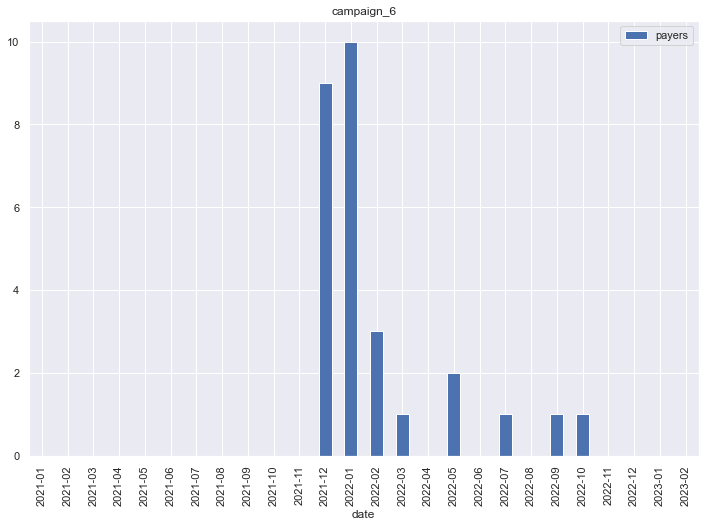

In [19]:
for campaign in sorted(dff.campaign.unique()):
    subdf = dff.where(dff.campaign == campaign).dropna()
    subdf.plot(
        x = 'date',
        y = 'payers',
        kind='bar',
        title = campaign
    )

In [20]:
#2.2.5 средняя прибыль на пользователя (за все время): прибыль с кампании / количество новых пользователей
avg_profit_per_user_per_camp = {}

for each in sum_profit_per_camp.keys():
    avg_profit_per_user_per_camp[each] = sum_profit_per_camp[each] / un_installs[each]
    print(each, round(avg_profit_per_user_per_camp[each], 2))

campaign_6 2.01
campaign_4 450.7
campaign_2 190.82
campaign_5 1.19
campaign_1 117.63
campaign_3 0.91


# Задание 2.3 
Выберете по вашему мнению самый 
1. эффективный канал (media_channel),
2. географию (country_code) и 
3. платформу (platform)

Объясните свой выбор на данных. 

In [21]:
df.columns

Index(['install_date', 'event_date', 'event_name', 'gross_event_revenue_usd',
       'net_event_revenue_usd', 'event_source', 'media_channel ', 'campaign',
       'country_code', 'customer_user_id', 'platform_id'],
      dtype='object')

In [22]:
costs.columns

Index(['date', 'campaign', 'media_channel', 'platform', 'country_code',
       'cost'],
      dtype='object')

In [23]:
df = df.rename(columns={'media_channel ':'media_channel'}) #пробел затесался

#приведем к одной форме
df = df.rename(columns={'platform_id':'platform'})
costs.platform = costs.platform.map({'IOS':'ios', 'ANDROID':'android'})

* В качестве метрик выберу: <br/>
    установки, затраты, стоимость привлечения одного пользователя, суммарная прибыль, средняя прибыль на пользователя, roi

In [24]:
def gimmistats(df, costs, param):
    

    #количество уникальных установок
    mch_un_installs = {}

    for each in sorted(df[param].unique()):
        try:
            mch_un_installs[each] = df.where(df[param] == each).where(df.event_name == 'install')[param].value_counts()[0]
        except IndexError:
            mch_un_installs[each] = 0
        

    #суммарные затраты на проведение рекламных кампаний
    cost_per_mch = {}

    for each in sorted(costs[param].dropna().unique()):
        try:
            cost_per_mch[each] = costs.where(costs[param] == each).cost.sum()
        except IndexError:
            cost_per_mch[each] = 0
        

    #суммарная прибыль от привлеченных пользователей
    sum_prof_per_mch = {}

    for each in sorted(df[param].unique()):
        try:
            sum_prof_per_mch[each] = round(df.where(df[param] == each).where(df.event_name == 'purchase').net_event_revenue_usd.sum(), 2)
        except IndexError:
            sum_prof_per_mch[each] = 0


    #Стоимость привлечения
    cost_per_new_user_mch = {}

    for each in cost_per_mch.keys():
        try:
            cost_per_new_user_mch[each] = round(cost_per_mch[each] / mch_un_installs[each], 2)
        except KeyError:
            cost_per_new_user_mch[each] = infinite
        except ZeroDivisionError:
            if cost_per_mch[each] == 0:
                cost_per_new_user_mch[each] = 0
            elif mch_un_installs[each] == 0:
                cost_per_new_user_mch[each] = infinite


    #Средняя прибыль на пользователя
    avg_prof_per_user_per_mch = {}

    for each in sum_prof_per_mch.keys():
        try:
            avg_prof_per_user_per_mch[each] = round(sum_prof_per_mch[each] / mch_un_installs[each], 2)
        except ZeroDivisionError:
            if sum_prof_per_mch[each] == 0:
                avg_prof_per_user_per_mch[each] = 0
            elif mch_un_installs[each] == 0:
                avg_prof_per_user_per_mch[each] = infinite

 
    #roi
    mch_roi = {}

    for each in sum_prof_per_mch.keys():
        if cost_per_mch[each] != 0: #в такой конструкции, т.к. вместо ошибки отдает nan
            mch_roi[each] = round(
                ((sum_prof_per_mch[each] - cost_per_mch[each]) / cost_per_mch[each] )*100, 2)
        else:
            mch_roi[each] = infinite

    #Объединение
    predf = []
    for mch in sorted(df[param].unique()):
        predf.append( 
            (mch, mch_un_installs[mch], cost_per_mch[mch], cost_per_new_user_mch[mch], 
            sum_prof_per_mch[mch], avg_prof_per_user_per_mch[mch], mch_roi[mch] )
        )



    return predf

# канал (media_channel)

In [25]:
#media channel

predf =  gimmistats(df, costs, 'media_channel')
pd.DataFrame(list(predf), columns=['media_channel','unq_installs', 'cost', 'cost_per_user', 'sum_prof', 'prof_per_user', 'roi %'])

,media_channel,unq_installs,cost,cost_per_user,sum_prof,prof_per_user,roi %
0,Apple Search Ads,123,327633.0,2663.68,14467.94,117.63,-95.58
1,Facebook Ads,496,1035728.0,2088.16,76979.62,155.20,-92.57
2,moloco_int,94,95042.0,1011.09,111.81,1.19,-99.88


# Ответ

Самым эффективным каналом привлечения выберу Facebook Ads с меньшей стоимостью за одного пользователя, большей прибылью с пользователя и большим roi

# география (country_code)

In [ ]:
#country code

predf = gimmistats(df, costs, 'country_code')
ccdf = pd.DataFrame(list(predf), columns=['country_code','unq_installs', 'cost', 'cost_per_user', 'sum_prof', 'prof_per_user', 'roi %'])

In [27]:
ccdf.sort_values(by=['roi %','unq_installs', 'prof_per_user'], ascending=False).head(5)

,country_code,unq_installs,cost,cost_per_user,sum_prof,prof_per_user,roi %
33,IR,4,0.0,0.00,0.00,0.00,inf
58,RS,4,553.0,138.25,79.90,19.98,-85.55
17,DK,32,84576.0,2643.00,11781.33,368.17,-86.07
66,US,272,822360.0,3023.38,76722.48,282.07,-90.67
12,CO,1,668.0,668.00,45.30,45.30,-93.22


In [28]:
ccdf.sort_values(by=['roi %','unq_installs', 'prof_per_user'], ascending=False).where(ccdf['unq_installs'] > 5).dropna() #по 4 человека из RS и IR молодцы, но этого слишком мало для оценки

,country_code,unq_installs,cost,cost_per_user,sum_prof,prof_per_user,roi %
17,DK,32.0,84576.0,2643.00,11781.33,368.17,-86.07
66,US,272.0,822360.0,3023.38,76722.48,282.07,-90.67
61,TH,55.0,161263.0,2932.05,2527.40,45.95,-98.43
25,GR,6.0,2113.0,352.17,19.29,3.22,-99.09
69,ZA,8.0,5301.0,662.62,33.04,4.13,-99.38
65,UK,6.0,10749.0,1791.50,28.07,4.68,-99.74
11,CL,9.0,16877.0,1875.22,22.56,2.51,-99.87
15,CZ,6.0,2311.0,385.17,2.92,0.49,-99.87
59,RU,94.0,96061.0,1021.93,115.15,1.23,-99.88
16,DE,7.0,14280.0,2040.00,12.37,1.77,-99.91


Явно топ 2 в географии будут DK и US, но выбрать лучшего сложно <br/>
Стоит смотреть что-то еще

In [65]:
us_dk_df = df.loc[ df['country_code'].isin(['US', 'DK'])]

<AxesSubplot:xlabel='country_code', ylabel='net_event_revenue_usd'>

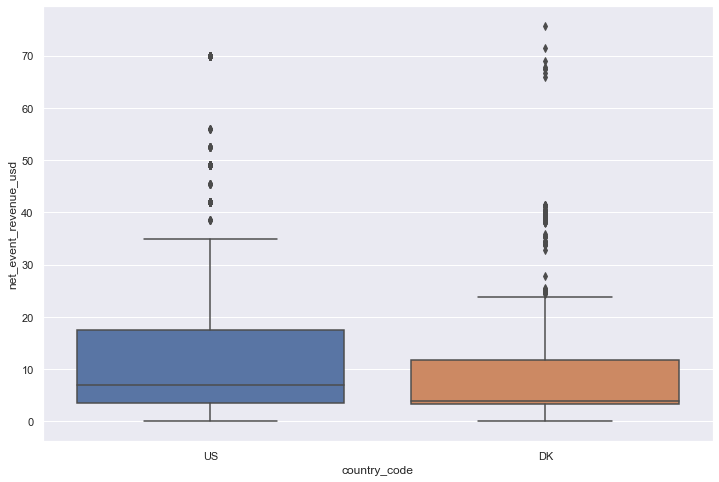

In [71]:
sns.boxplot(data=us_dk_df, x='country_code', y='net_event_revenue_usd')

<AxesSubplot:xlabel='net_event_revenue_usd', ylabel='Count'>

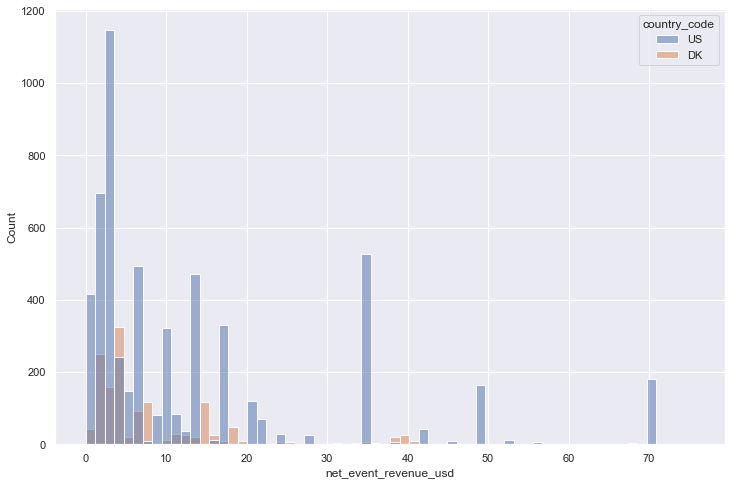

In [72]:
sns.histplot(data=us_dk_df, x='net_event_revenue_usd', hue='country_code')

In [220]:
dk_users = []
for user in us_dk_df.where(us_dk_df['event_name'] == 'purchase').where(us_dk_df['country_code'] == 'DK').dropna().customer_user_id.unique():
    dk_users.append([
            user, 
            round(us_dk_df.where(us_dk_df['event_name'] == 'purchase').where(us_dk_df['customer_user_id'] == user).dropna().net_event_revenue_usd.sum(), 2), #сумма на пользователя
            len(us_dk_df.where(us_dk_df['event_name'] == 'purchase').where(us_dk_df['customer_user_id'] == user).dropna()), #количество операций
            us_dk_df.where(us_dk_df['event_name'] == 'purchase').where(us_dk_df['customer_user_id'] == user).dropna().net_event_revenue_usd.max() #наибольшая разовая покупка (прибыль)
        ])

dk_users = pd.DataFrame(dk_users, columns=[['user', 'profit','n_transactions', 'max_transaction']])

dk_users.columns = dk_users.columns.get_level_values(0) #при попытке сортировки жаловался на мультииндекс, это решает проблему

In [221]:
dk_users.sort_values(by=['profit'], ascending=False)

,user,profit,n_transactions,max_transaction
6,user_718,11704.22,1334,75.6298
4,user_55,34.68,9,11.4152
2,user_48,33.19,11,3.7435
1,user_35,5.54,2,4.0206
5,user_72,1.46,1,1.4649
0,user_29,1.45,2,0.7264
3,user_54,0.79,1,0.7865


In [112]:
11704/11781

0.9934640522875817

Практически всю прибыль (99.35%) среди игроков Дании принес один т.н. Кит <br/>
Я бы предпочел назвать это большим везением, и, возможно, такие выбросы - не то,  <br/>
на что стоит ориентироваться

In [225]:
#тоже самое для us пользователей

us_users = []
for user in us_dk_df.where(us_dk_df['event_name'] == 'purchase').where(us_dk_df['country_code'] == 'US').dropna().customer_user_id.unique():
    us_users.append([
            user, 
            us_dk_df.where(us_dk_df['event_name'] == 'purchase').where(us_dk_df['customer_user_id'] == user).dropna().net_event_revenue_usd.sum(),
            len(us_dk_df.where(us_dk_df['event_name'] == 'purchase').where(us_dk_df['customer_user_id'] == user).dropna()),
            us_dk_df.where(us_dk_df['event_name'] == 'purchase').where(us_dk_df['customer_user_id'] == user).dropna().net_event_revenue_usd.max() 
        ])

us_users = pd.DataFrame(us_users, columns=[['user', 'profit','n_transactions', 'max_transaction']])

us_users.columns = us_users.columns.get_level_values(0)

In [228]:
us_users.sort_values(by=['profit'], ascending=False).head(20)

,user,profit,n_transactions,max_transaction
2,user_3,46173.449,3293,69.993
45,user_725,25214.700,1271,70.000
24,user_56,1577.100,283,56.000
43,user_719,924.000,184,49.000
23,user_13,892.500,24,70.000
19,user_41,620.200,114,17.500
6,user_7,335.664,48,34.993
17,user_37,260.400,21,70.000
7,user_8,153.104,28,17.493
21,user_45,64.400,11,14.000


In [236]:
us_users.sort_values(by=['profit'], ascending=False).profit[:5].sum() / 76722 #топ 5 игроков по прибыли / прибыль на регион

0.9747106305883579

In [239]:
us_users.sort_values(by=['profit'], ascending=False).profit[:10].sum() / 76722 #топ 10 игроков по прибыли / прибыль на регион

0.9933984645864288

US - 5 игроков из 272 принесли 97.5% прибыли, а 10 уже 99.34% <br/>
В Дании 1 из 32, который принес 99.34%

*

Можно попробовать убрать китов из выборки и посмотреть <br/>
Но тогда от DK ничего толком не остается :)

In [266]:
no_whale_dk_users = dk_users.where(dk_users.profit < 100).dropna() #тут я за китов принял игроков, которые принесли > $100
no_whale_dk_users['country'] = 'DK'

no_whale_us_users = us_users.where(us_users.profit < 100).dropna()
no_whale_us_users['country'] = 'US'

data = pd.concat([no_whale_dk_users, no_whale_us_users]) #объедили в df чтобы визуализировать

<AxesSubplot:xlabel='profit', ylabel='n_transactions'>

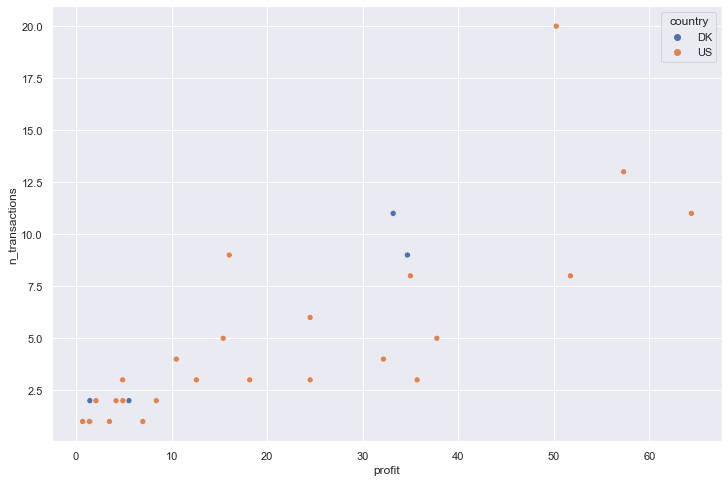

In [267]:
sns.scatterplot(data=data, x='profit', y='n_transactions', hue='country')

# Ответ

По итогам удаления китов из выборки отдам предпочтение US, потому как от DK ничего толком и не осталось :)

*

Может быть есть смысл посмотреть на TH?

In [33]:
thai = df.where(df['country_code'] == 'TH')

th_users = []
for user in thai.where(thai['event_name'] == 'purchase').dropna().customer_user_id.unique():
    th_users.append([
            user, 
            round(thai.where(thai['event_name'] == 'purchase').where(thai['customer_user_id'] == user).dropna().net_event_revenue_usd.sum(), 2), #сумма на пользователя
            len(thai.where(thai['event_name'] == 'purchase').where(thai['customer_user_id'] == user).dropna()), #количество операций
            thai.where(thai['event_name'] == 'purchase').where(thai['customer_user_id'] == user).dropna().net_event_revenue_usd.max() #наибольшая разовая покупка (прибыль)
        ])

th_users = pd.DataFrame(th_users, columns=[['user', 'profit','n_transactions', 'max_transaction']])

th_users

,user,profit,n_transactions,max_transaction
0,user_46,3.20,1,3.1953
1,user_60,1.31,1,1.3138
2,user_714,10.24,3,3.4556
3,user_715,149.04,15,17.2676
4,user_716,2167.57,401,17.8872
5,user_717,13.19,3,6.3645
6,user_722,179.65,70,13.2235
7,user_727,3.21,1,3.2062


Но кажется ситуация крайне схожа с DK

# платформа (platform)

Теперь хочется и здесь кроме просмотра по метрикам посмотреть еще и на китов

In [49]:
for user in df.customer_user_id.unique():
    if len(df.where(df['customer_user_id'] == user).platform.dropna().unique()) == 2:
        print(user, ' - пользуется приложением на двух платформах')

In [69]:
platform_data = []

# for platform in df.platform.unique():
for user in df.customer_user_id.unique():
    platform_data.append([ 
            df.where(df['customer_user_id'] == user).platform.dropna().unique()[0],
            user, 
            round(df.where(df['event_name'] == 'purchase').where(df['customer_user_id'] == user).dropna().net_event_revenue_usd.sum(), 2),
            len(df.where(df['event_name'] == 'purchase').where(df['customer_user_id'] == user).dropna()),
            round(df.where(df['event_name'] == 'purchase').where(df['customer_user_id'] == user).dropna().net_event_revenue_usd.sum(), 2) > 100     
    ])

platform_users = pd.DataFrame(platform_data, columns=[['platform', 'user', 'profit', 'n_transactions', 'is_whale']])
platform_users.columns = platform_users.columns.get_level_values(0)

In [72]:
platform_users.is_whale.sum()

13

In [73]:
for platform in platform_users.platform.unique():
    print(platform, platform_users.where(platform_users['platform'] == platform).is_whale.sum())

android 3
ios 10


In [70]:
pd.pivot_table(platform_users,
               index=['platform', 'is_whale'],
               )

n_transactions        profit
platform is_whale                              
android  False           0.532353      1.617294
         True         1123.000000  15554.070000
ios      False           0.633952      1.745040
         True          371.700000   4368.938000

In [36]:
#platform

predf = gimmistats(df, costs, 'platform')
pd.DataFrame(list(predf), columns=['platform','unq_installs', 'cost', 'cost_per_user', 'sum_prof', 'prof_per_user', 'roi %'])

,platform,unq_installs,cost,cost_per_user,sum_prof,prof_per_user,roi %
0,android,340,523770.0,1540.50,47212.12,138.86,-90.99
1,ios,373,934633.0,2505.72,44347.25,118.89,-95.26


# Ответ

По метрикам android выглядит ощутимо лучше по всем параметрам

На ios предсказуемо больше китов (по моей отсечке в $100), и без китов ios предсказуемо генерит чуть больше прибыли на человека

Тем не менее отдам предпочтение android, где прибыли на человека чуть меньше, но и реклама обошлась ощутимо дешевле

# Задание 3. Распределение Revenue между источниками

Скопировал таблицу и выполнил в google sheets, там показалось удобнее

Рассчет конечно ну очень примерный, но какой есть :)

https://docs.google.com/spreadsheets/d/1E6uLC70BLrWJXBFKIHJk06W-uEd49Ag_JIdKDFgsMv0/edit?usp=sharing